In [3]:
pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\dhani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show keras

Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: C:\Users\dhani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages
Requires: 
Required-by: tensorflow-intel
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf #importing Tensorflow

Loading MNIST data

In [6]:
mnist = tf.keras.datasets.mnist

Dividing dataset into training and testing sets

In [25]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

Data Preprocessing

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

In [10]:
import matplotlib.pyplot as plt

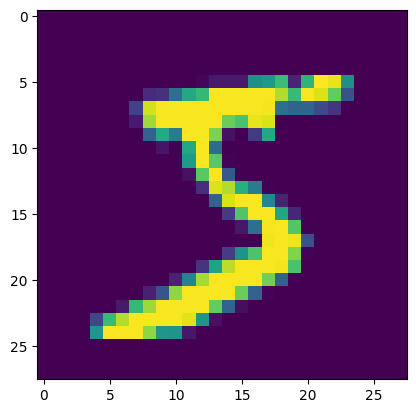

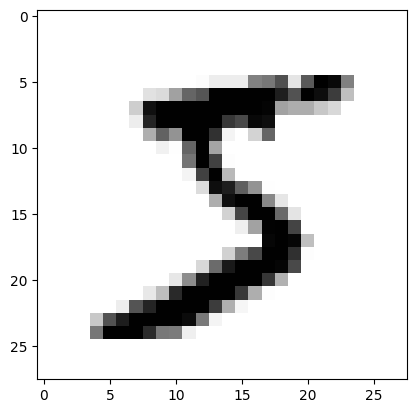

In [11]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap=plt.cm.binary)


In [12]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Normalizing the data

In [28]:
X_train = tf.keras.utils.normalize(X_train,axis = 1)
X_test = tf.keras.utils.normalize(X_test,axis = 1)

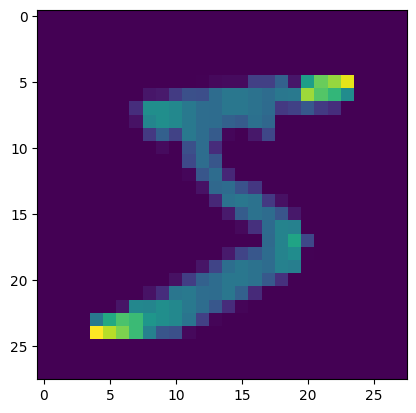

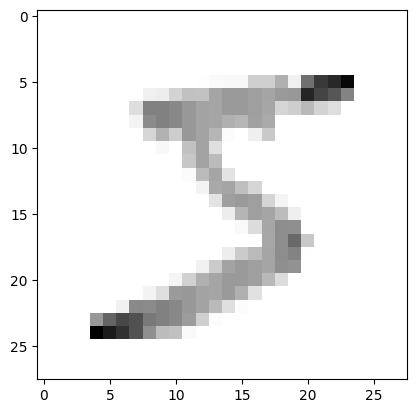

In [14]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap=plt.cm.binary)

Resizing the image

In [15]:
import numpy as np

In [29]:
#Resizing the images to the 28x28(784 pixels)
IMG_SIZE=28
X_trainr = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_testr = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [30]:
X_trainr.shape , X_testr.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Creating Deep Learning Architecture

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [19]:
model = Sequential() ##Creating Neural Network

##First Convolution layer
model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##Second Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##Third Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##Fully Connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

##Fully Connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

##Last Connected layer
model.add(Dense(10))
model.add(Activation('softmax'))



In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [21]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=['accuracy'])

In [22]:
model.fit(X_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 38s 27ms/step - loss: 0.3414 - accuracy: 0.8930 - val_loss: 0.1236 - val_accuracy: 0.9619
Epoch 2/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.1045 - accuracy: 0.9675 - val_loss: 0.1163 - val_accuracy: 0.9649
Epoch 3/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0745 - accuracy: 0.9770 - val_loss: 0.0977 - val_accuracy: 0.9705
Epoch 4/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.0646 - val_accuracy: 0.9796
Epoch 5/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0485 - accuracy: 0.9841 - val_loss: 0.0674 - val_accuracy: 0.9792


Testing the model on test data

In [23]:
IMG_SIZE=28
X_testr = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [31]:
#Evaluating on testing set
test_loss, test_acc = model.evaluate(X_testr, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0624 - accuracy: 0.9816


In [32]:
predictions = model.predict([X_testr]) ## Predictions of the test data

313/313 [==============================] - 2s 7ms/step


In [33]:
print(predictions) #printing the predictions on test data

[[7.2365701e-08 8.2919235e-07 7.0319411e-06 ... 9.9997771e-01
  1.8102428e-07 1.2362090e-05]
 [2.2927097e-05 2.6874985e-05 9.9934429e-01 ... 3.3420503e-05
  5.6138675e-04 8.5789168e-07]
 [2.5692698e-08 9.9998987e-01 4.5492084e-07 ... 1.0578135e-06
  6.5458116e-06 3.1368756e-07]
 ...
 [1.5608008e-07 2.3533319e-05 1.2204048e-07 ... 1.9349416e-05
  1.1055567e-04 1.6484110e-04]
 [1.4107868e-06 3.1847922e-08 7.5518071e-11 ... 2.2709827e-07
  9.4874682e-05 8.8142697e-05]
 [4.6252628e-04 5.3731615e-06 1.4062105e-04 ... 6.0704538e-06
  8.6200205e-05 4.3638298e-05]]


In [34]:
print(np.argmax(predictions[0]))

7


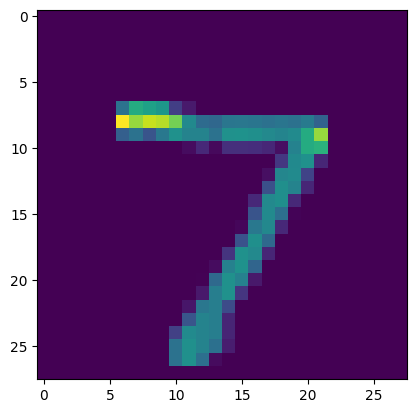

In [35]:
plt.imshow(X_test[0])

In [36]:
print(np.argmax(predictions[465]))

8


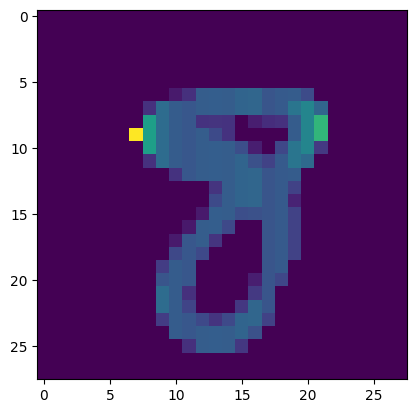

In [37]:
plt.imshow(X_test[465])

Testing with hand drawn digit

In [38]:
import pickle
pickle.dump(model, open('digitrecognizer.pkl','wb'))

In [39]:
import pickle
model = pickle.load(open('digitrecognizer.pkl', 'rb')) #using the saved model for predicting new handdrawn digit

Saving the model using pickle

In [40]:
import cv2 #importing OpenCV2
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np

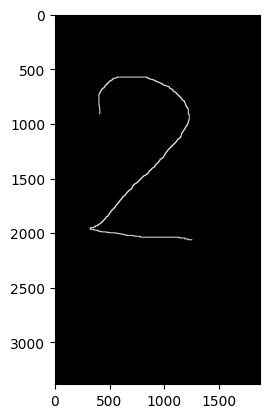

1/1 [==============================] - 0s 136ms/step
The predicted value is :  3


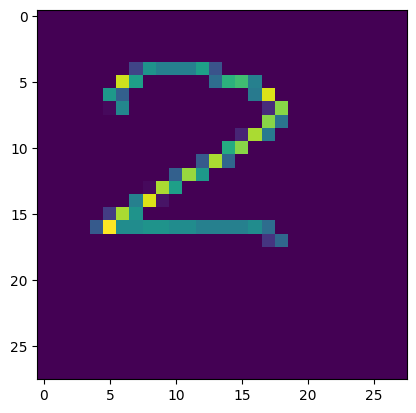

In [42]:
#uploading a hand drawn image and resizing it to test in the model
img  = cv2.imread('test1.png')
plt.imshow(img)
plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)
plt.imshow(resized)

newimg = tf.keras.utils.normalize(resized,axis=1)
newimg = np.array(newimg).reshape(-1,28,28,1)

predictions = model.predict(newimg) #predicting the hand drawn digit using model
print("The predicted value is : ",np.argmax(predictions))